In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.applications.vgg16 import VGG16

from typing import List
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = models.Sequential()

input_shape = (224, 224, 3)

c = 64
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu',
                        input_shape=input_shape))

# defualt pool_size=(2, 2)
model.add(layers.MaxPool2D(padding='valid'))

c = 128
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 256
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 512
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 512
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 256)       5

In [3]:
# DONE Sequential or Functional
def vggnet_model(config: List, batch_norm: bool, input_shape: List):
    model = models.Sequential()
    c = config[0]

    model.add(layers.Conv2D(filters=c, 
                            kernel_size=3, 
                            padding='same', 
                            activation='relu',
                            input_shape=input_shape))

    for c in config[1:]:
        if c == 'M':
            model.add(layers.MaxPool2D())
        else:
            model.add(layers.Conv2D(filters=c, 
                                    kernel_size=3, 
                                    activation='relu',
                                    padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', input_dim=(512 * 7 * 7)))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1000, activation='softmax'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [4]:
vgg_A_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg_B_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 
                512, 512, 'M', 512, 512, 'M']

vgg_C_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 
                512, 512, 512, 'M', 512, 512, 512, 'M']

vgg_E_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 
                512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']

In [5]:
input_shape = [224, 224, 3]
test_vggnet = vggnet_model(config=vgg_A_config, batch_norm=True, input_shape=input_shape)

print(test_vggnet.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 256)      

In [6]:
input_shape = [150, 150, 3]
vggnet = vggnet_model(config=vgg_A_config, batch_norm=True, input_shape=input_shape)

In [7]:
vggnet.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-4),
               metrics=['acc'])

In [8]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/Keras/code_test/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Keras/code_test


In [9]:
folder_dir = os.getcwd()
print(folder_dir)

/content/drive/MyDrive/Colab Notebooks/Keras/code_test


In [10]:
base_dir = folder_dir + '/datasets/cats_vs_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2009 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print(f"data batch shape  : {data_batch.shape}")
    print(f"labels batch shape: {labels_batch.shape}")
    break

data batch shape  : (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
# TODO model.fit_generator > model.fit
history = vggnet.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_data=validation_generator,
                              validation_steps=50)

# TODO 저장된 모델을 추후에 재학습        
vggnet.save('./models/cats_and_dogs_vggnet.h5')

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 488s 5s/step - loss: 0.6932 - acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/5
100/100 [==============================] - 16s 154ms/step - loss: 0.6932 - acc: 0.4852 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/5
100/100 [==============================] - 15s 155ms/step - loss: 0.6932 - acc: 0.4977 - val_loss: 0.6930 - val_acc: 0.4990
Epoch 4/5
100/100 [==============================] - 16s 156ms/step - loss: 0.6926 - acc: 0.5259 - val_loss: 0.6916 - val_acc: 0.5800
Epoch 5/5
100/100 [==============================] - 16s 156ms/step - loss: 0.6907 - acc: 0.5500 - val_loss: 0.6940 - val_acc: 0.5000


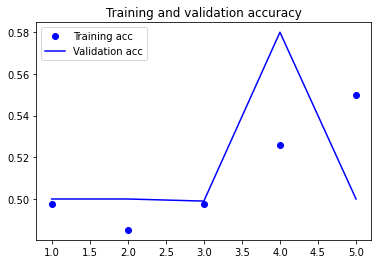

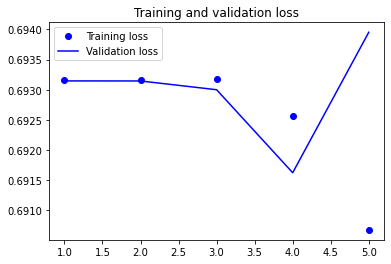

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()